# Import the libraries

In [340]:
import pandas as pd  # data processing,
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# Load the dataset

In [341]:
df = pd.read_csv('data/retail_price.csv')
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [342]:
df.columns


Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

## Exploratory Data Analysis

### checking the shape of the dataset

In [343]:
df.shape

(676, 30)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [345]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [346]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [347]:
df.index

RangeIndex(start=0, stop=676, step=1)

In [348]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [349]:
df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [350]:
df['qty'].sum()

np.int64(9799)

In [351]:
df['total_price'].sum()

np.float64(961751.0999999999)

In [352]:
df.count()

product_id                    676
product_category_name         676
month_year                    676
qty                           676
total_price                   676
freight_price                 676
unit_price                    676
product_name_lenght           676
product_description_lenght    676
product_photos_qty            676
product_weight_g              676
product_score                 676
customers                     676
weekday                       676
weekend                       676
holiday                       676
month                         676
year                          676
s                             676
volume                        676
comp_1                        676
ps1                           676
fp1                           676
comp_2                        676
ps2                           676
fp2                           676
comp_3                        676
ps3                           676
fp3                           676
lag_price     

# Calculate Revenue and Profit:

In [353]:
df['revenue'] = df['qty'] * df['total_price']
df['profit'] = df['revenue'] - df['freight_price']

In [354]:
df['margin'] = (df['profit'] / df['revenue']) * 100

In [355]:
df['price_ratio_1'] = df['unit_price'] / df['comp_1']
df['price_ratio_2'] = df['unit_price'] / df['comp_2']
df['price_ratio_3'] = df['unit_price'] / df['comp_3']

In [356]:
df['price_diff_1'] = df['unit_price'] - df['comp_1']
df['price_diff_2'] = df['unit_price'] - df['comp_2']
df['price_diff_3'] = df['unit_price'] - df['comp_3']

In [357]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


# Market demand indicators

In [358]:
df['customer_score_ratio'] = df['customers'] / df['product_score']
df['customer_photo_ratio'] = df['customers'] / df['product_photos_qty']
df['description_length_ratio'] = df['product_description_lenght'] / df['product_name_lenght']

In [359]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


# Time-related Features:

In [360]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['is_holiday'] = df['holiday']

In [361]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


# Lagged Price:

In [362]:
df['lag_price'] = df.groupby('product_id')['total_price'].shift(1)

# Handling Categorical Variables:

In [363]:
# One-hot encoding example
df_encoded = pd.get_dummies(df, columns=['product_category_name', 'weekday'])


# Scaling Numeric Features:

In [364]:
scaler = StandardScaler()
numeric_features = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
                    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                    'product_score', 'customers', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2',
                    'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']

df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Splitting the Dataset:

In [365]:
X = df_scaled.drop('total_price', axis=1)  # Features
y = df_scaled['total_price']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Visualization

In [366]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'revenue', 'profit', 'margin',
       'price_ratio_1', 'price_ratio_2', 'price_ratio_3', 'price_diff_1',
       'price_diff_2', 'price_diff_3', 'customer_score_ratio',
       'customer_photo_ratio', 'description_length_ratio', 'is_weekend',
       'is_holiday'],
      dtype='object')

# Subset the dataset with relevant columns

In [367]:
# Subset the dataset with relevant columns
subset_cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday']
subset_df = df[subset_cols]

# Compute correlation matrix

In [368]:
# ensure nbformat is installed for proper mime-type rendering in the notebook
%pip install "nbformat>=4.2.0"

fig = px.histogram(df, x='total_price', nbins=50, title='distribution of total price')
fig.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## distribution of the unit price

In [369]:
fig = px.box(df, y='unit_price', title='Distribution of Unit Price')
fig.show()

# bivariate analysis


### convert month year to datetime for better time base analysis

In [370]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Revenue trend over time

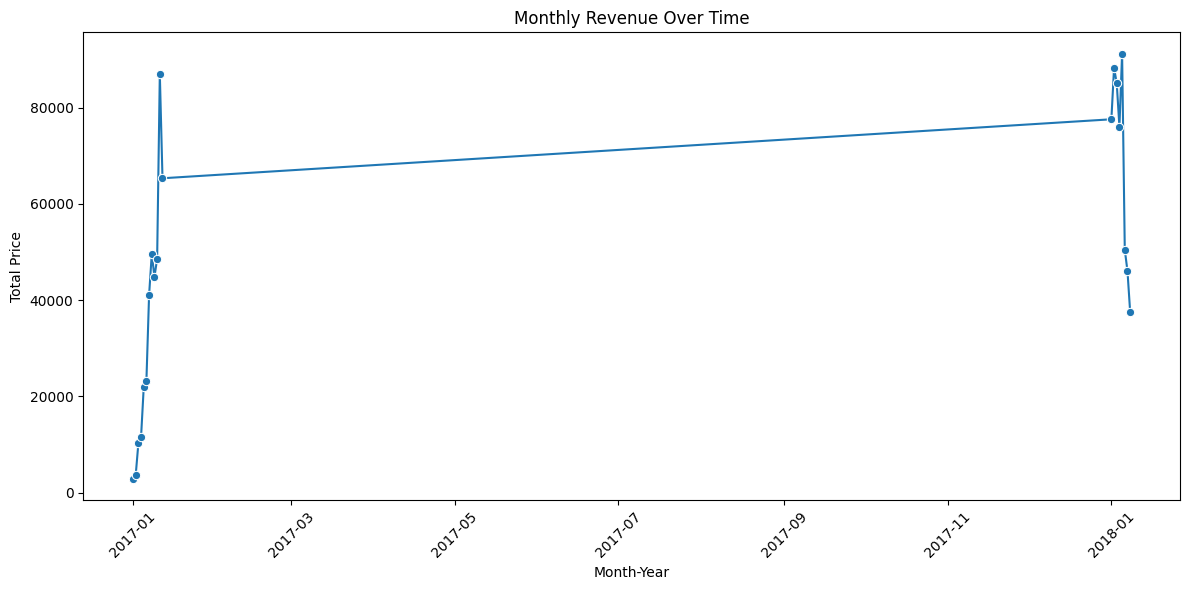

In [371]:
monthly_revenue = df.groupby('month_year')['total_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_year', y='total_price', marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation analysis

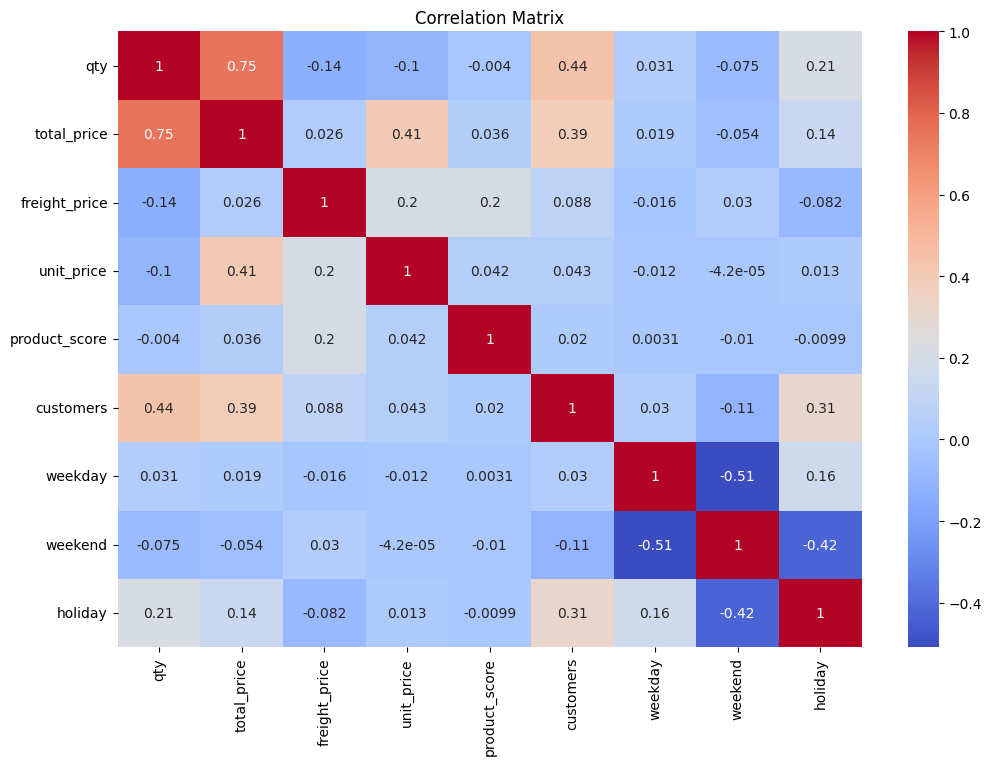

In [372]:
# Compute correlation matrix
corr_matrix = subset_df.corr()
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Competitor Analysis

In [373]:
df['comp_1_diff'] = df['unit_price'] - df['comp_1']
df['comp_2_diff'] = df['unit_price'] - df['comp_2']
df['comp_3_diff'] = df['unit_price'] - df['comp_3']


In [374]:
fig = px.box(df, x='product_category_name', y='comp_1', title='Competitor 1 Price by Product Category')
fig.show()

In [375]:
fig = px.histogram(df, x='product_category_name', y='comp_1_diff', title='Competitor 1 Price Difference by Product Category', nbins=20)
fig.show()

In [376]:
fig = px.histogram(
    df,
    x='product_category_name',
    y='comp_2_diff',
    title='Competitor 2 Price Difference by Product Category',
    nbins=20
)
fig.show()

In [377]:
#

In [378]:
fig = px.histogram(
    df,
    x='product_category_name',
    y='comp_3_diff',
    title='Competitor 3 Price Difference by Product Category',
    nbins=20
)
fig.show()

## freight price difference 

In [379]:
df['fp1_diff'] = df['unit_price'] - df['fp1']
df['fp2_diff'] = df['unit_price'] - df['fp2']
df['fp3_diff'] = df['unit_price'] - df['fp3']

# Use the correct competitor diff column names (they have underscores: comp_1_diff etc.)
comp_cols = ['comp_1_diff', 'comp_2_diff', 'comp_3_diff']

# Aggregate by category then melt for grouped bar plot
agg = df.groupby('product_category_name')[comp_cols].sum().reset_index()
melt = agg.melt(id_vars='product_category_name', value_vars=comp_cols,
                var_name='competitor', value_name='price_diff')

fig = px.bar(
    melt,
    x='product_category_name',
    y='price_diff',
    color='competitor',
    title='Competitor Price Difference by Product Category',
    barmode='group'
)
fig.show()

## monthwise sales analysis

In [380]:
monthly_df=df.groupby(by='month_year').agg({'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum', 'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df=monthly_df.sort_values('month_year')
monthly_df.head()


,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
1,2017-01-02,127.827143,3584.11,217.847838,35,180,72,78
2,2017-01-03,122.586615,10204.38,282.314965,101,299,104,242
3,2017-01-04,119.288667,11524.62,335.440132,121,300,150,309
4,2017-01-05,104.785769,21843.33,393.828633,222,460,160,803


In [381]:
fig = px.scatter(monthly_df, x='customers', y='total_price', trendline='ols', title='total price vs number of customers')
fig.show()

## weekly analysis of total price 

In [382]:
fig = px.scatter(monthly_df, x='weekend', y='total_price', trendline='ols', title='weekly analysis of total price vs weekend days')
fig.show()

## customers per month

In [383]:
fig = px.bar(monthly_df, x='month_year', y='customers',  title='customers per month')
fig.show()

## FEATURE ENGINEERING BY AGGREGATING DATA FRAME BY PRODUCTS

In [384]:
cols_to_mean = ['comp_1_diff', 'comp_2_diff', 'comp_3_diff', 'product_id', 'fp1_diff', 'fp2_diff', 'fp3_diff',  'product_score', 'unit_price']
cols_to_sum = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]


## aggregate the data frame based on type

In [385]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum(numeric_only=True)
products = pd.concat([products_mean, products_sum], axis=1, join='inner').reset_index()
products.head()

,product_id,comp_1_diff,comp_2_diff,comp_3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price,total_price,freight_price,customers
0,bed1,-43.976523,-47.634907,0.000000,24.556900,25.701649,27.186316,4.0,42.211989,5831.77,240.410762,915
1,bed2,0.000000,-28.547817,37.032861,69.711160,68.721303,71.925405,3.9,86.774536,42938.66,324.204152,968
2,bed3,7.599892,0.000000,51.588471,73.440164,76.436268,76.815006,3.3,92.101364,10304.96,172.316049,530
3,bed4,-38.826174,0.000000,6.085263,27.923696,31.567814,31.543827,4.2,46.725444,6011.77,151.576305,515
4,bed5,108.481703,0.000000,152.431703,182.940058,179.178602,183.929536,4.4,198.381703,29997.36,96.015504,385


## feature selection

In [386]:
X, y=products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']


In [387]:
print("Selected Features:")
print(X.columns.tolist())
print(f"\nNumber of features: {len(X.columns)}")
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Selected Features:
['comp_1_diff', 'comp_2_diff', 'comp_3_diff', 'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'total_price', 'freight_price', 'customers']

Number of features: 10

Shape of X: (52, 10)
Shape of y: (52,)


## model training

In [388]:
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)


Training Set Performance:
Mean Absolute Error (MAE): 2.4261
Mean Squared Error (MSE): 22.1563
Root Mean Squared Error (RMSE): 4.7070
R-squared (R2): 0.9957

Feature Importance:
         feature  importance
5       fp3_diff    0.401976
4       fp2_diff    0.226919
3       fp1_diff    0.164850
0    comp_1_diff    0.074885
1    comp_2_diff    0.062664
2    comp_3_diff    0.036850
7    total_price    0.017577
9      customers    0.009646
6  product_score    0.003139
8  freight_price    0.001495


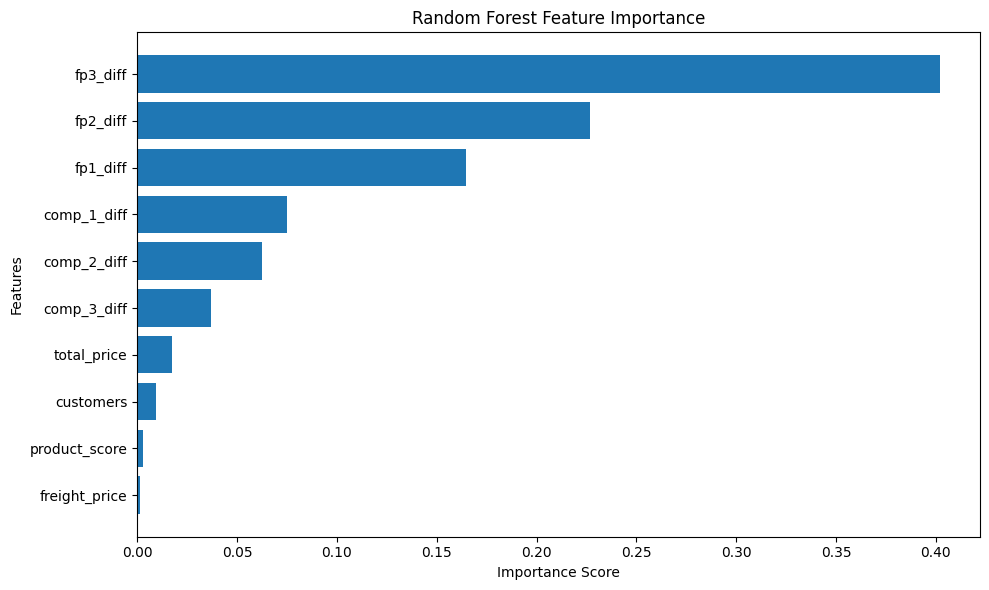

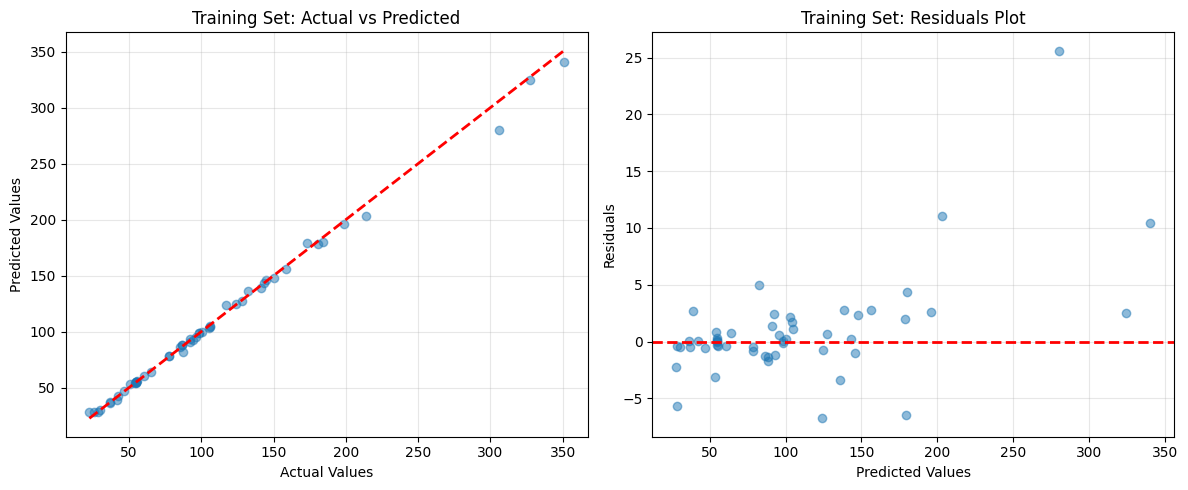

In [389]:
# Evaluate model on training data
train_metrics = evaluate_model(y, y_pred, "Training")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("Feature Importance:")
print("="*50)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

# Training set predictions
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Set: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## SAVE THE MODEL

In [390]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

print("Model saved successfully as 'trained_model.pkl'")
print(f"Model type: {type(model)}")
print(f"Number of trees: {model.n_estimators}")
print(f"Number of features: {model.n_features_in_}")

Model saved successfully as 'trained_model.pkl'
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Number of trees: 50
Number of features: 10
